In [106]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

import numpy as np
import re

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# read positive and negative words from text files
with open('positive-words.txt', 'r') as f:
    positive_words = f.read().splitlines()

with open('negative-words.txt', 'r') as f:
    negative_words = f.read().splitlines()

# print(negative_words)
# list of pronouns
pronouns = ['I', 'me', 'my', 'you', 'your']

# function to extract features
def extract_features(review, label):
#     print("Start Extract")
#     print(review)
#     review = review[0]
    review = review.lower()
    # tokenize the review text
#     print(type(review))
#     print(review)
    tokens = word_tokenize(review)
    # remove punctuation
#     review = re.sub(r'[^\w\s]', '', review)
#     print(review)

#     # remove stop words
#     stop_words = set(stopwords.words('english'))
#     filtered_tokens = [token for token in tokens if token not in stop_words]

    # lemmatize tokens
#     lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # count of positive words
    pos_count = 0
    for word in positive_words:
        pos_count += lemmatized_tokens.count(word)

    # count of negative words
    neg_count = 0
    for word in negative_words:
        neg_count += lemmatized_tokens.count(word)

    # presence of 'no'
    no_count = 1 if 'no' in lemmatized_tokens else 0
    
    # presence of 'not'
    not_count = 1 if 'not' in lemmatized_tokens else 0
    
    # count of pronouns
    pron_count = 0
    for word in pronouns:
        pron_count += lemmatized_tokens.count(word)

    # presence of '!'
    excl_count = 1 if '!' in review else 0

    # log(length of review)
    log_length = np.log(len(lemmatized_tokens)+1)

    return [pos_count, neg_count, no_count, not_count, pron_count, excl_count, log_length]
#     return [pos_count, neg_count, no_count, pron_count, excl_count, log_length]

In [107]:
from nltk.classify import NaiveBayesClassifier

# positive_reviews = []
# with open('positive-reviews.txt', 'r') as f:
#     for line in f:
#         positive_reviews.append(line.strip())

# negative_reviews = []
# with open('negative-reviews.txt', 'r') as f:
#     for line in f:
#         negative_reviews.append(line.strip())

# # extract features for each review
# # positive_reviews = []
# for review in positive_reviews:
# #     print(type(review))
#     features = extract_features(review)
#     positive_reviews.append((features, 'positive'))

# # negative_reviews = []
# for review in negative_reviews:
#     features = extract_features(review)
#     negative_reviews.append((features, 'negative'))

reviews = []
with open('positive-reviews.txt', 'r') as pos_file, open('negative-reviews.txt', 'r') as neg_file:
    pos_reviews = pos_file.readlines()
    neg_reviews = neg_file.readlines()
    for review, label in zip(pos_reviews, ['positive']*len(pos_reviews)):
        reviews.append((review, label))
    for review, label in zip(neg_reviews, ['negative']*len(neg_reviews)):
        reviews.append((review, label))


# print(reviews[0:10])
print(len(pos_reviews))
print(len(neg_reviews))
print(len(reviews))
# train the classifier
# classifier = NaiveBayesClassifier.train(train_set)


22936
22932
45868


In [108]:
testre = reviews[24000]
print(testre)
print(testre[0])
extract_features(testre[0],testre[1])

# for i in reviews:
#     for j in i[0]:
#         if j == "null":
#             print(i)

('Very slow to warm up. Slow to initialize prior to printing. Noisy printer\n', 'negative')
Very slow to warm up. Slow to initialize prior to printing. Noisy printer



[1, 3, 0, 0, 0, 0, 2.772588722239781]

In [109]:
from sklearn.model_selection import train_test_split

# Extract the features and labels
X = [extract_features(review, label) for review, label in reviews]
y = [label for review, label in reviews]
print(X[10:20])
import numpy as np

# check for NaN values in the input data
if np.isnan(X).any():
    # find the indices of the NaN values
    idx = np.where(np.isnan(X))
    # remove the NaN values from the input data
#     X = np.delete(X, idx, axis=0)
#     y = np.delete(y, idx, axis=0)
    print(idx)

# check for infinite values in the input data
if np.isinf(X).any():
    # find the indices of the infinite values
    idx = np.where(np.isinf(X))
    print(idx)
    # remove the infinite values from the input data
    X = np.delete(X, idx, axis=0)
    y = np.delete(y, idx, axis=0)
# check if there's missing values


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)





[[0, 0, 0, 0, 0, 0, 0.6931471805599453], [2, 0, 0, 0, 0, 0, 2.3978952727983707], [1, 0, 0, 0, 0, 0, 1.0986122886681098], [0, 0, 0, 0, 0, 0, 2.1972245773362196], [4, 0, 0, 0, 0, 0, 2.6390573296152584], [1, 0, 0, 0, 0, 0, 1.6094379124341003], [1, 0, 0, 0, 0, 0, 2.302585092994046], [0, 0, 0, 0, 0, 0, 2.302585092994046], [3, 0, 0, 0, 0, 0, 2.70805020110221], [1, 0, 0, 0, 0, 0, 1.9459101490553132]]


In [110]:
# for i in X:
#     if i[2] > 0:
#         print(X)

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Create an instance of the classifier
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 83.55%


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the logistic regression model
# log_reg = LogisticRegression(random_state=42)
# # Train the model on the training data
# log_reg.fit(X_train, y_train)
# # Make predictions on the testing data
# y_pred = log_reg.predict(X_test)

# # Evaluation for logistic regression
# print("Accuracy: ", accuracy_score(y_test, y_pred))
# print("Precision: ", precision_score(y_test, y_pred))
# print("Recall: ", recall_score(y_test, y_pred))
# print("F1-score: ", f1_score(y_test, y_pred))


# # Initialize the random forest model
# rf = RandomForestClassifier(random_state=42)
# # Train the model on the training data
# rf.fit(X_train, y_train)
# # Make predictions on the testing data
# y_pred = rf.predict(X_test)

# # Evaluation for Random Forest
# print("Accuracy: ", accuracy_score(y_test, y_pred))
# print("Precision: ", precision_score(y_test, y_pred))
# print("Recall: ", recall_score(y_test, y_pred))
# print("F1-score: ", f1_score(y_test, y_pred))
log_reg = LogisticRegression()

# Fit the classifier to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred1 = log_reg.predict(X_test)

#Evaluate the model
print(classification_report(y_test, y_pred1, target_names=['negative', 'positive']))

# Create an instance of the random forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = rf.predict(X_test)

#Evaluate the model
print(classification_report(y_test, y_pred2, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.79      0.93      0.85      4607
    positive       0.91      0.76      0.83      4567

    accuracy                           0.84      9174
   macro avg       0.85      0.84      0.84      9174
weighted avg       0.85      0.84      0.84      9174

              precision    recall  f1-score   support

    negative       0.80      0.91      0.85      4607
    positive       0.89      0.78      0.83      4567

    accuracy                           0.84      9174
   macro avg       0.85      0.84      0.84      9174
weighted avg       0.85      0.84      0.84      9174



In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# specify the hyperparameters and their possible values
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# create a logistic regression model
logreg = LogisticRegression()

# create a grid search object
grid_search = GridSearchCV(logreg, param_grid, cv=5, return_train_score=True)

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best set of hyperparameters
print(grid_search.best_params_)


c:\python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this

{'C': 10, 'penalty': 'l2'}


c:\python\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.83893826        nan 0.84060065        nan 0.84090042]
  warnings.warn(
c:\python\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [       nan 0.83897913        nan 0.84055976        nan 0.84096855]
  warnings.warn(


In [114]:
# create a new logistic regression model with the best hyperparameters
logreg = LogisticRegression(**grid_search.best_params_)

# fit the model to the entire training set
logreg.fit(X_train, y_train)


LogisticRegression(C=10)

In [115]:
# make predictions on the test set
y_pred3 = logreg.predict(X_test)
print(classification_report(y_test, y_pred3, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.79      0.93      0.85      4607
    positive       0.91      0.76      0.83      4567

    accuracy                           0.84      9174
   macro avg       0.85      0.84      0.84      9174
weighted avg       0.85      0.84      0.84      9174



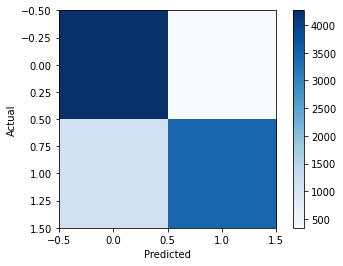

In [122]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred3)

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [117]:
import pickle

with open('classifier.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

In [118]:
loaded_model = pickle.load(open("classifier.pkl", "rb"))

In [136]:
sentence = "the product has no abnormal. It works great"
label = ""
features = extract_features(sentence, label)
label = loaded_model.predict([features])
print(label)


['negative']
